Nachdem jeder von uns eine lineare Regression über 2 Warengruppen berechnet hat und bereits mit der richtigen id zum hochkaden versehen hat werden diese files nun hier zusammen geführt. Die finale datei kann dann bei kaggle hochgeladen werden.

In [16]:
import pandas as pd
import numpy as np

In [17]:
#load the data
#Warengruppe_1 = Brot
df_1 = pd.read_csv('./00_Archive/Umsatzvorhersage_Brot_Hochladeformat.csv')
print(df_1.head())

#Warengruppe_2 = Brötchen
df_2 = pd.read_csv('./00_Archive/Umsatzvorhersage_Broetchen_Hochladeformat.csv')
print(df_2.head())

#Warengruppe_3 = Croissants
df_3 = pd.read_csv('./00_Archive/Croissants_sample_submission.csv')
print(df_3.head())

#Warengruppe_4 = Konditorei
df_4 = pd.read_csv('./00_Archive/Konditorei_sample_submission.csv')
print(df_4.head())

#Warengruppe_5 = Kuchen
df_5 = pd.read_csv('./00_Archive/kuchen_sample_submission.csv')
print(df_5.head())

#Warengruppe_6 = Saisonbrot
df_6 = pd.read_csv('./00_Archive/saisonbrot_sample_submission.csv')
print(df_6.head())
print(df_6.tail())

        id      Umsatz
0  1808011  136.312455
1  1808021  152.319869
2  1808031  144.021737
3  1808041  163.872037
4  1808051   94.088221
        id      Umsatz
0  1808012  510.034425
1  1808022  521.377082
2  1808032  529.906651
3  1808042  668.994872
4  1808052  724.025789
        id      Umsatz
0  1808013  239.649219
1  1808023  232.736675
2  1808033  239.320965
3  1808043  307.512735
4  1808053  313.222980
        id      Umsatz
0  1808014   71.295503
1  1808024   64.213064
2  1808034   66.859881
3  1808044   69.772785
4  1808054  127.427443
        id      Umsatz
0  1808015  303.031586
1  1808025  270.447776
2  1808035  270.447776
3  1808045  277.672660
4  1808055  313.621086
        id     Umsatz
0  1811016  46.564502
1  1811026  53.124108
2  1811036  80.750774
3  1811046  71.680140
4  1811056  53.765667
         id     Umsatz
51  1812226  72.247372
52  1812236  71.038581
53  1812246  71.038581
54  1812276  71.038581
55  1812286  71.038581


In [18]:
#concatenate the data
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
print(df.head())
print(df.tail())

print(df.shape)

        id      Umsatz
0  1808011  136.312455
1  1808021  152.319869
2  1808031  144.021737
3  1808041  163.872037
4  1808051   94.088221
         id     Umsatz
51  1812226  72.247372
52  1812236  71.038581
53  1812246  71.038581
54  1812276  71.038581
55  1812286  71.038581
(1830, 2)


In [19]:
#als kontrolle einmal die samplesubmission einlesen
df_sample = pd.read_csv('./sample_submission.csv')
print(df_sample.head())
print(df_sample.tail())
print(df_sample.shape)

        id  Umsatz
0  1808011       0
1  1808021       0
2  1808031       0
3  1808041       0
4  1808051       0
           id  Umsatz
1825  1812226       0
1826  1812236       0
1827  1812246       0
1828  1812276       0
1829  1812286       0
(1830, 2)


In [20]:
#export the data
df.to_csv('./Umsatzvorhersage_Team12.csv', index=False)

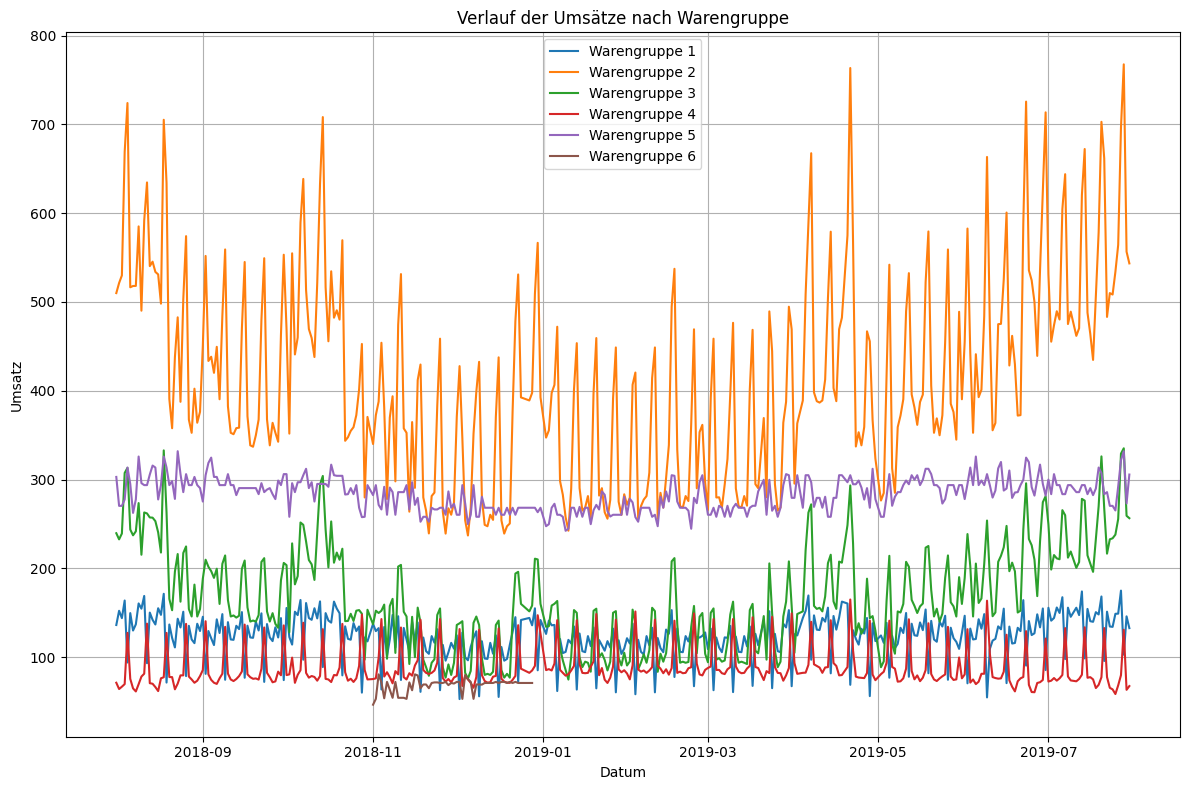

In [21]:
#Kontrollplot
import matplotlib.pyplot as plt
# Extrahieren des Datums und der Warengruppe aus der ID
df['Datum'] = pd.to_datetime(df['id'] // 10, format='%y%m%d')
df['Warengruppe'] = df['id'] % 10

# Erstellen eines Plots für jede Warengruppe
plt.figure(figsize=(12, 8))

for warengruppe in sorted(df['Warengruppe'].unique()):
    gruppen_data = df[df['Warengruppe'] == warengruppe]
    plt.plot(gruppen_data['Datum'], gruppen_data['Umsatz'], label=f'Warengruppe {warengruppe}')

plt.title('Verlauf der Umsätze nach Warengruppe')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
